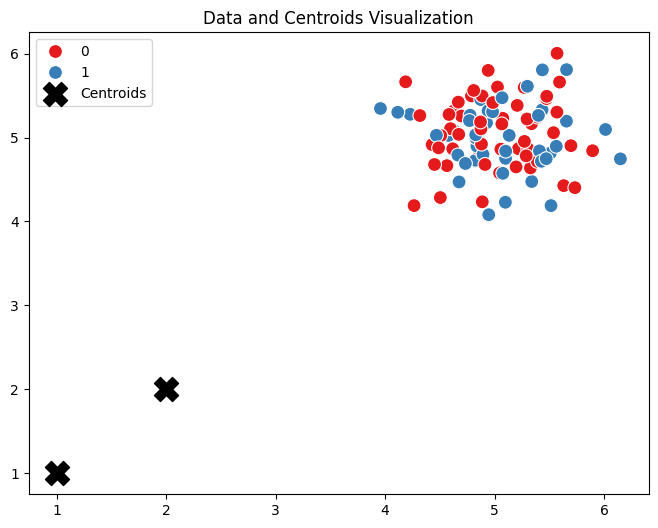

In [18]:
import sys
inp = input("<data_file> <algorithm_name> <metric> <cluster_count>")
# m = int(m)
labels = inp.split(" ")
if len(labels) != 4:
    sys.exit("Not a valid input")

labels[0] = "Datasets\\" + labels[0][:-4] + "\\" + labels[0]

%run plot_clusters.py {labels[0]} centroids.txt cluster_labels.txt
